# Mini Project on Crime Data Analytics

**Dataset:** District_Wise_crimes_against_children.csv  
**Source:** https://www.data.gov.in/resource/district-wise-number-crime-against-children-during-2022

---

In [60]:
sc

<SparkContext master=local[*] appName=PySparkShell>

## Dataset Insights
The dataset provided contains district-level records of crimes against children collected from the National Crime Records Bureau (NCRB) across various Indian States and Union Territories. It provides information on different categories of crimes such as Murder, Kidnapping, Foeticide, Human Trafficking, Cyber Crimes, and other IPC and SLL violations. The dataset serves as a valuable resource for crime pattern analysis, predictive modeling, and public safety insights. Below are the detailed insights:

### 1. Structure and Uniqueness
The dataset comprises approximately **970 rows and 72 columns**, covering every district under multiple states and UTs. Each record corresponds to a unique district entry under a specific state. The dataset ensures no missing values, and each crime category is represented as a numeric attribute, providing consistency for quantitative analysis. This structure allows for scalable state-wise and district-level aggregation.

### 2. Crime Categories
There are multiple categories of crimes recorded under IPC (Indian Penal Code) and SLL (Special & Local Laws). Key columns include *Murder (Sec. 302 IPC)*, *Kidnapping and Abduction*, *Foeticide*, *Cyber Crimes*, and *Total Crimes Against Children (IPC+SLL)*. These classifications enable comparative and trend-based analysis of specific types of offenses. The inclusion of detailed subcategories provides granularity that aids in targeted crime prevention strategies.

### 3. State-wise Representation
All major Indian States and Union Territories are included in the dataset. States like **Maharashtra, Uttar Pradesh, Madhya Pradesh, and West Bengal** exhibit higher reported counts of child-related crimes, while smaller or northeastern states show comparatively lower figures. This distribution highlights regional disparities, influenced by population density, awareness, law enforcement efficiency, and reporting standards.

### 4. Murder and Violent Crime Insights
The column *Murder (Sec. 302 IPC)* captures serious offenses involving children. The average number of murder cases per district remains low, though some states have significantly higher counts. Violent crimes such as abetment of suicide and attempt to murder are also recorded, allowing for a comprehensive understanding of the intensity and spread of child-targeted violence.

### 5. Cyber Crime Trends
Cyber Crimes under the Information Technology Act are comparatively fewer but show a gradual rise in technologically developed states. These include offenses such as online exploitation, harassment, and trafficking through digital channels. Such data is crucial for identifying emerging threats in urban and digitally connected regions.

### 6. Total Crimes and Comparative Analysis
The *Total Crimes Against Children (IPC + SLL)* column aggregates both IPC and SLL offenses, providing a complete view of the child crime scenario. High total values often correspond to densely populated or urbanized regions. The distribution is highly **right-skewed**, meaning a few states account for the majority of the total crimes, indicating uneven socio-legal awareness and reporting mechanisms.

### 7. Correlation Patterns
Preliminary analysis suggests certain relationships:
- **State vs. Total Crimes:** Larger states tend to have higher totals, consistent with population size and case reporting.
- **Murder vs. Cyber Crimes:** No direct correlation — states with higher murder rates don’t necessarily have high cybercrime rates.
- **Urbanization vs. Crime Rate:** Higher urbanization correlates with increased cyber and trafficking cases, while rural dominance correlates with SLL crimes like child marriage or labor.

### 8. Dataset Reliability and Use
The dataset is clean, consistent, and ready for analysis. It contains no missing values, and the numerical structure enables direct integration with Big Data frameworks such as PySpark for distributed processing. It can be used to identify trends, high-risk zones, and for building predictive models in public safety and social welfare analytics.

---

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("C:/Users/kandu/Downloads/District_Wise_crimes_against_children.csv")
df

,Sl. No,State/UT,State/UT/District,Murder (Sec.302 IPC) - Murder (Sec.302 IPC) (Col.4+Col.5) - Col. ( 3),Murder (Sec.302 IPC) - Murder with Rape/POCSO - Col. ( 4),Murder (Sec.302 IPC) - Other Murder - Col. ( 5),Abetment of Suicide of Child (Sec.305 IPC) - Col. ( 6),Attempt to Commit Murder (Sec.307 IPC) - Col. ( 7),Infanticide (Sec.315 IPC) - Col. ( 8),Foeticide (Sec. 315 & 316 IPC) - Col. ( 9),...,"Immoral Traffic (Prevention) Act, 1956 - C) Others - Col. ( 62)",Child Labour (Prohibition & Regulation) Act - Col. ( 63),Prohibition of Child Marriage Act - Col. ( 64),Transplantation of Human Organs Act - Col. ( 65),Cyber Crimes/Information Technology Act - Cyber Crimes/ Information Technology Act (Col.67+Col.68) - Col. ( 66),Cyber Crimes/Information Technology Act - A) Publishing or Transmitting of material depicting children in sexually explicit act - Col. ( 67),Cyber Crimes/Information Technology Act - B) Other Cyber Crimes against Children - Col. ( 68),Other SLL crimes - Col. ( 69),Total SLL Crimes against Children - Col. ( 70),Total Crimes against Children (IPC+ SLL) - Col. ( 71)
0,1,Andhra Pradesh,Alluri Sitharama Raju,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,14,17
1,2,Andhra Pradesh,Anakapalli,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,58,65
2,3,Andhra Pradesh,Anantapuramu,4,0,4,0,1,0,0,...,0,0,2,0,7,7,0,0,74,168
3,4,Andhra Pradesh,Annamayya,1,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,38,49
4,5,Andhra Pradesh,Bapatla,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,56,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,1,Lakshadweep,Lakshadweep,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,11
966,Total Districts,Total Districts,Total Districts,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,11
967,1,Puducherry,Karaikal,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
968,2,Puducherry,Puducherry,3,0,3,0,0,0,0,...,0,0,0,0,4,4,0,0,109,139


In [26]:
def log_hist(data, title, xlabel):
    plt.figure(figsize=(8,5))
    plt.hist(np.log1p(data), bins=20, color="skyblue", edgecolor="black")
    plt.title(f"Log-Scaled {title}")
    plt.xlabel(f"Log({xlabel} + 1)")
    plt.ylabel("District Count")
    plt.show()

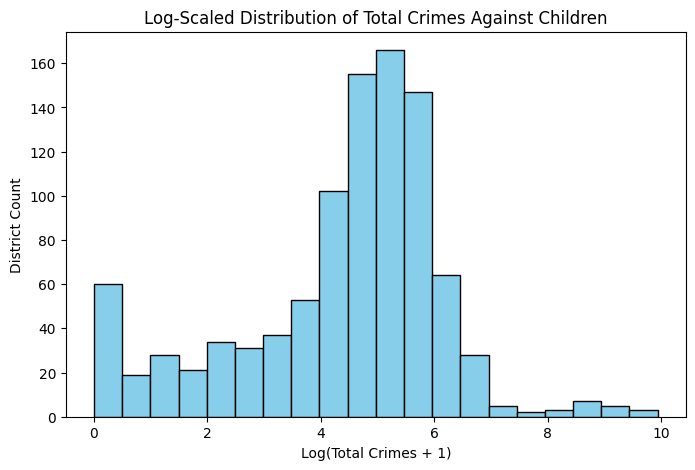

In [27]:
log_hist(df["Total Crimes against Children (IPC+ SLL) - Col. ( 71)"], 
         "Distribution of Total Crimes Against Children", "Total Crimes")


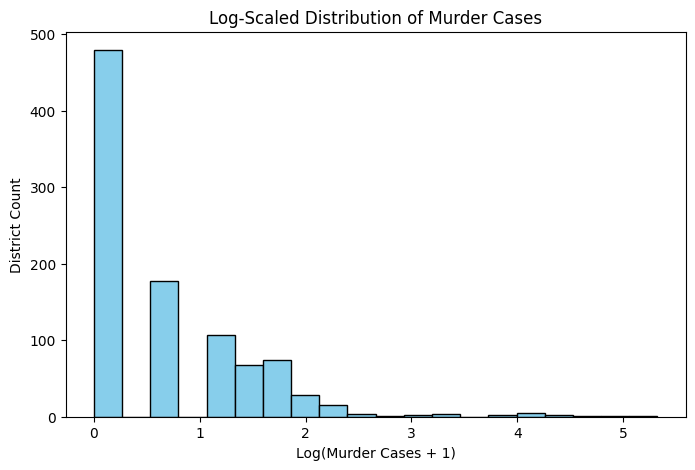

In [28]:
log_hist(df["Murder (Sec.302 IPC) - Murder (Sec.302 IPC) (Col.4+Col.5) - Col. ( 3)"], 
         "Distribution of Murder Cases", "Murder Cases")

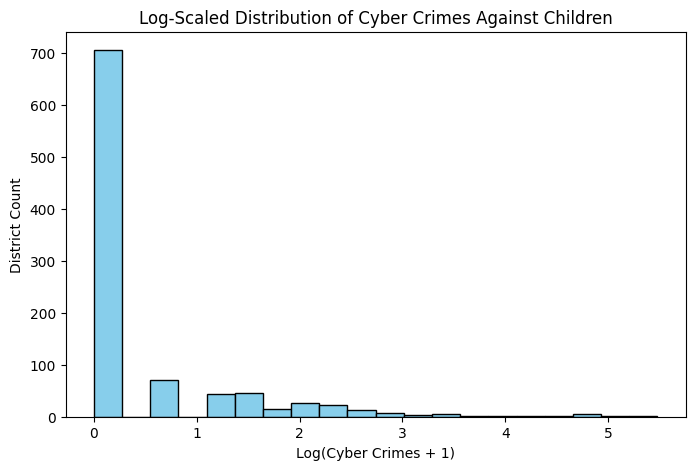

In [29]:
log_hist(df["Cyber Crimes/Information Technology Act - Cyber Crimes/ Information Technology Act (Col.67+Col.68) - Col. ( 66)"], 
         "Distribution of Cyber Crimes Against Children", "Cyber Crimes")

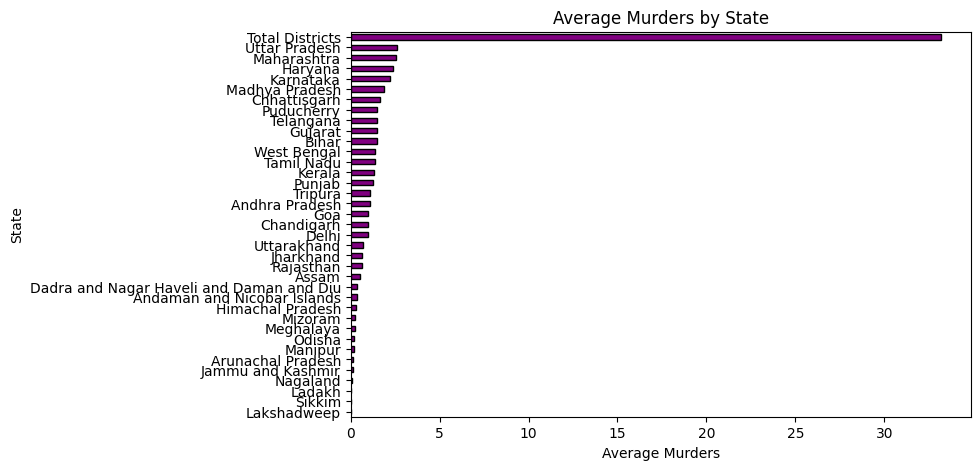

In [30]:
avg_murder = df.groupby("State/UT")["Murder (Sec.302 IPC) - Murder (Sec.302 IPC) (Col.4+Col.5) - Col. ( 3)"].mean().sort_values()
avg_murder.plot(kind="barh", figsize=(8,5), color="purple", edgecolor="black")
plt.title("Average Murders by State")
plt.xlabel("Average Murders")
plt.ylabel("State")
plt.show()

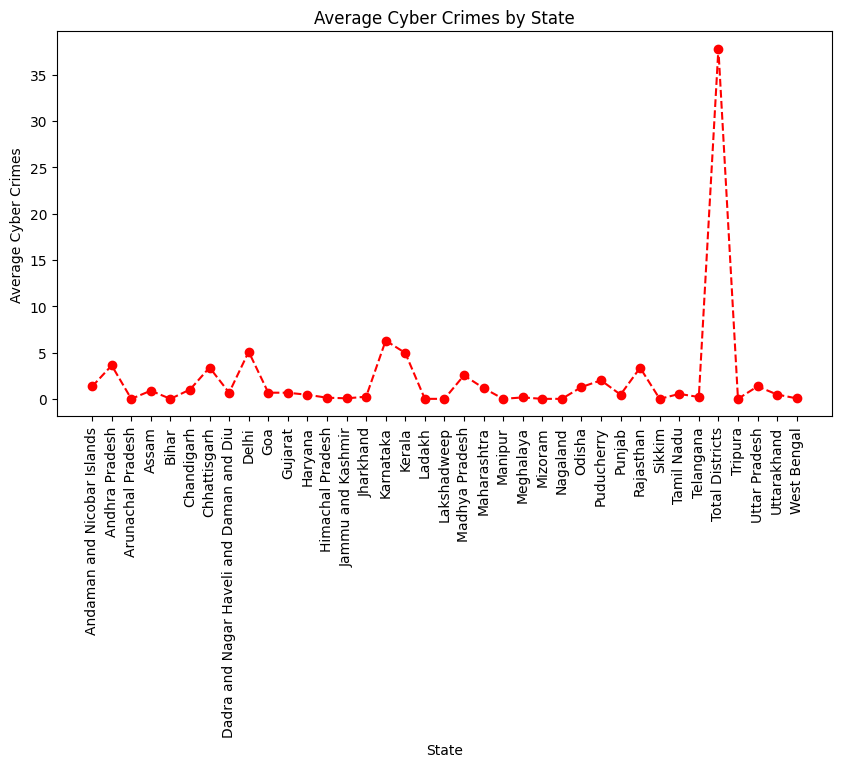

In [31]:
avg_cyber = df.groupby("State/UT")["Cyber Crimes/Information Technology Act - Cyber Crimes/ Information Technology Act (Col.67+Col.68) - Col. ( 66)"].mean()
plt.figure(figsize=(10,5))
plt.plot(avg_cyber.index, avg_cyber.values, marker="o", linestyle="--", color="red")
plt.title("Average Cyber Crimes by State")
plt.xlabel("State")
plt.ylabel("Average Cyber Crimes")
plt.xticks(rotation=90)
plt.show()

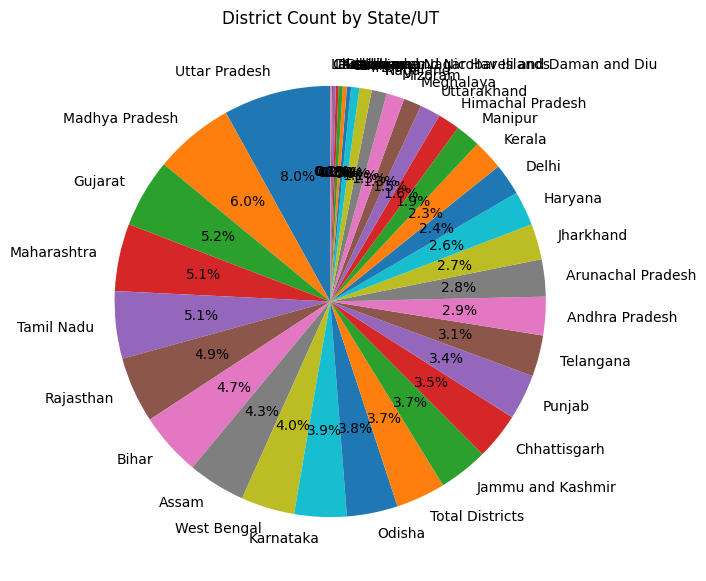

In [32]:
df["State/UT"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(7,7), startangle=90)
plt.title("District Count by State/UT")
plt.ylabel("")
plt.show()

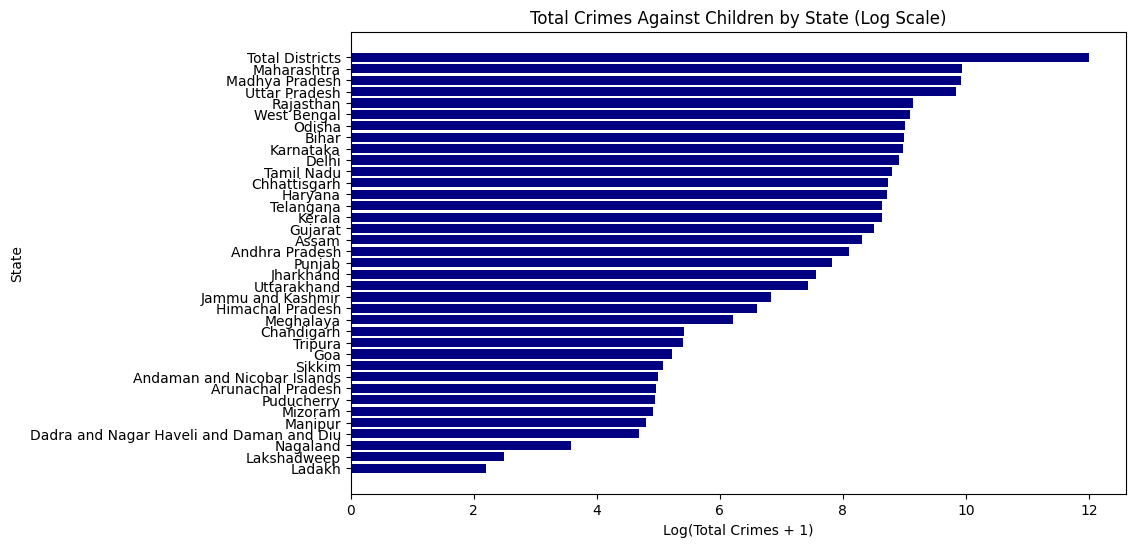

In [33]:
state_crimes = df.groupby("State/UT")["Total Crimes against Children (IPC+ SLL) - Col. ( 71)"].sum().sort_values()
plt.figure(figsize=(10,6))
plt.barh(state_crimes.index, np.log1p(state_crimes.values), color="navy")
plt.title("Total Crimes Against Children by State (Log Scale)")
plt.xlabel("Log(Total Crimes + 1)")
plt.ylabel("State")
plt.show()

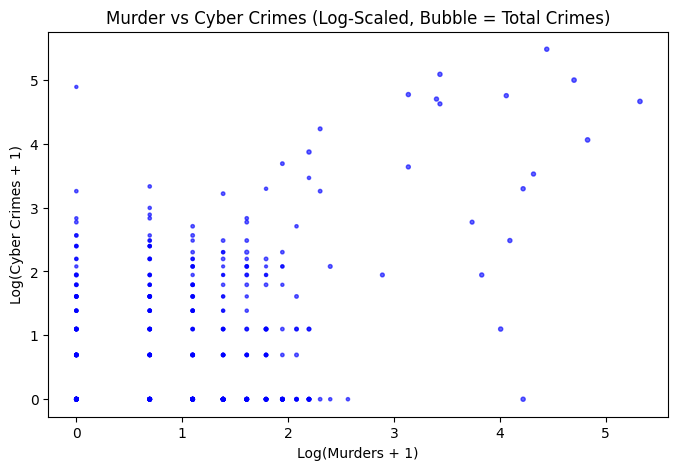

In [34]:
plt.figure(figsize=(8,5))
plt.scatter(np.log1p(df["Murder (Sec.302 IPC) - Murder (Sec.302 IPC) (Col.4+Col.5) - Col. ( 3)"]), 
            np.log1p(df["Cyber Crimes/Information Technology Act - Cyber Crimes/ Information Technology Act (Col.67+Col.68) - Col. ( 66)"]), 
            s=np.log1p(df["Total Crimes against Children (IPC+ SLL) - Col. ( 71)"]), alpha=0.6, c="blue")
plt.title("Murder vs Cyber Crimes (Log-Scaled, Bubble = Total Crimes)")
plt.xlabel("Log(Murders + 1)")
plt.ylabel("Log(Cyber Crimes + 1)")
plt.show()

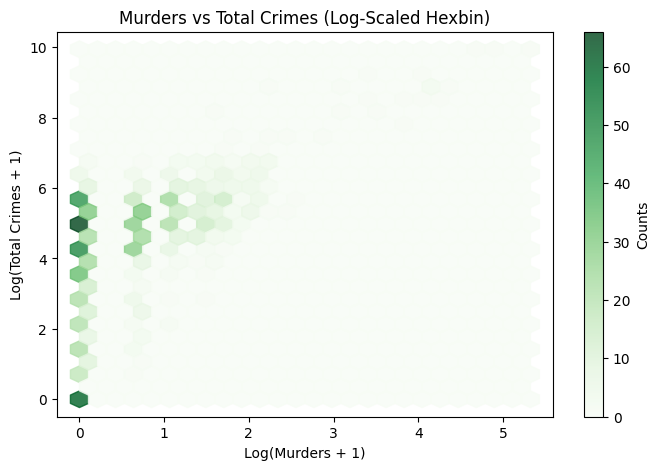

In [35]:
plt.figure(figsize=(8,5))
plt.hexbin(np.log1p(df["Murder (Sec.302 IPC) - Murder (Sec.302 IPC) (Col.4+Col.5) - Col. ( 3)"]), 
           np.log1p(df["Total Crimes against Children (IPC+ SLL) - Col. ( 71)"]), 
           gridsize=25, cmap="Greens", alpha=0.8)
plt.colorbar(label="Counts")
plt.title("Murders vs Total Crimes (Log-Scaled Hexbin)")
plt.xlabel("Log(Murders + 1)")
plt.ylabel("Log(Total Crimes + 1)")
plt.show()

<Figure size 1200x600 with 0 Axes>

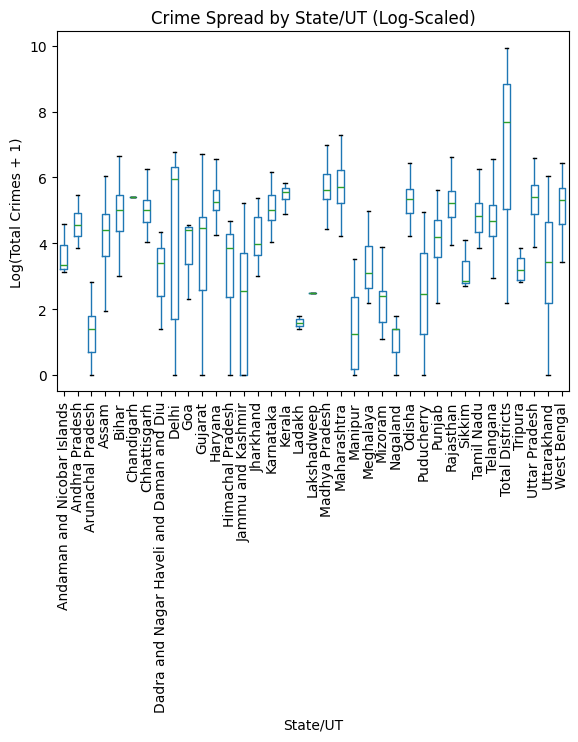

In [37]:
df_box = df.copy()

# Apply log transform only to the numeric column
df_box["Log_Total_Crimes"] = np.log1p(df_box["Total Crimes against Children (IPC+ SLL) - Col. ( 71)"])

# Boxplot: Crime Spread by State (Log Scale)
plt.figure(figsize=(12,6))
df_box.boxplot(column="Log_Total_Crimes", by="State/UT", grid=False, showfliers=False)
plt.title("Crime Spread by State/UT (Log-Scaled)")
plt.suptitle("")  # remove default subtitle
plt.xticks(rotation=90)
plt.ylabel("Log(Total Crimes + 1)")
plt.show()

In [38]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, min, max

# Start Spark session
spark = SparkSession.builder.appName("NCRB_Project").getOrCreate()

# Load dataset
df_spark = spark.read.option("header", True).option("inferSchema", True).csv("C:/Users/kandu/Downloads/District_Wise_crimes_against_children.csv")

In [39]:
print("Total number of districts:", df_spark.count())

Total number of districts: 970


In [40]:
print("Total number of States/UTs:", df_spark.select("State/UT").distinct().count())

Total number of States/UTs: 37


In [41]:
df_spark.select("State/UT").distinct().show()

+--------------------+
|            State/UT|
+--------------------+
|            Nagaland|
|           Karnataka|
|              Odisha|
|              Kerala|
|Dadra and Nagar H...|
|              Ladakh|
|          Tamil Nadu|
|        Chhattisgarh|
|      Andhra Pradesh|
|         Lakshadweep|
|      Madhya Pradesh|
|              Punjab|
|             Manipur|
|                 Goa|
|             Mizoram|
|    Himachal Pradesh|
|          Puducherry|
|             Haryana|
|   Jammu and Kashmir|
|           Jharkhand|
+--------------------+
only showing top 20 rows


In [42]:
df_spark.groupBy("State/UT").count().show()

+--------------------+-----+
|            State/UT|count|
+--------------------+-----+
|            Nagaland|   11|
|           Karnataka|   38|
|              Odisha|   37|
|              Kerala|   22|
|Dadra and Nagar H...|    3|
|              Ladakh|    2|
|          Tamil Nadu|   49|
|        Chhattisgarh|   34|
|      Andhra Pradesh|   28|
|         Lakshadweep|    1|
|      Madhya Pradesh|   58|
|              Punjab|   33|
|             Manipur|   18|
|                 Goa|    3|
|             Mizoram|   13|
|    Himachal Pradesh|   16|
|          Puducherry|    2|
|             Haryana|   25|
|   Jammu and Kashmir|   36|
|           Jharkhand|   26|
+--------------------+-----+
only showing top 20 rows


In [48]:
from pyspark.sql.functions import col, sum as _sum, avg, min, max

df_spark.groupBy("State/UT") \
    .agg(_sum(col("`Total Crimes against Children (IPC+ SLL) - Col. ( 71)`")).alias("Total_Crimes")) \
    .show()

df_spark.groupBy("State/UT") \
    .agg(min(col("`Total Crimes against Children (IPC+ SLL) - Col. ( 71)`")).alias("min_crimes"),
         max(col("`Total Crimes against Children (IPC+ SLL) - Col. ( 71)`")).alias("max_crimes")) \
    .show()

df_spark.groupBy("State/UT") \
    .agg(avg(col("`Total Crimes against Children (IPC+ SLL) - Col. ( 71)`")).alias("avg_crimes")) \
    .show()


+--------------------+------------+
|            State/UT|Total_Crimes|
+--------------------+------------+
|            Nagaland|          35|
|           Karnataka|        7988|
|              Odisha|        8240|
|              Kerala|        5640|
|Dadra and Nagar H...|         107|
|              Ladakh|           8|
|          Tamil Nadu|        6580|
|        Chhattisgarh|        6177|
|      Andhra Pradesh|        3308|
|         Lakshadweep|          11|
|      Madhya Pradesh|       20415|
|              Punjab|        2494|
|             Manipur|         120|
|                 Goa|         184|
|             Mizoram|         135|
|    Himachal Pradesh|         740|
|          Puducherry|         139|
|             Haryana|        6138|
|   Jammu and Kashmir|         920|
|           Jharkhand|        1917|
+--------------------+------------+
only showing top 20 rows
+--------------------+----------+----------+
|            State/UT|min_crimes|max_crimes|
+--------------------

In [51]:
df_spark.filter(
    col("`Murder (Sec.302 IPC) - Murder (Sec.302 IPC) (Col.4+Col.5) - Col. ( 3)`") >
    col("`Cyber Crimes/Information Technology Act - Cyber Crimes/ Information Technology Act (Col.67+Col.68) - Col. ( 66)`")
).select(
    "State/UT", 
    "State/UT/District", 
    "`Murder (Sec.302 IPC) - Murder (Sec.302 IPC) (Col.4+Col.5) - Col. ( 3)`", 
    "`Cyber Crimes/Information Technology Act - Cyber Crimes/ Information Technology Act (Col.67+Col.68) - Col. ( 66)`"
).show()


+-----------------+--------------------+---------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------+
|         State/UT|   State/UT/District|Murder (Sec.302 IPC) - Murder (Sec.302 IPC) (Col.4+Col.5) - Col. ( 3)|Cyber Crimes/Information Technology Act - Cyber Crimes/ Information Technology Act (Col.67+Col.68) - Col. ( 66)|
+-----------------+--------------------+---------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------+
|   Andhra Pradesh|Sri Potti Sriramu...|                                                                    1|                                                                                                              0|
|Arunachal Pradesh|           Changlang|                                                                    

In [58]:
from pyspark.sql.functions import when, col

df_updated = df_spark.withColumn(
    "Adjusted_Crimes",
    when(
        col("`Total Crimes against Children (IPC+ SLL) - Col. ( 71)`") > 100,
        col("`Total Crimes against Children (IPC+ SLL) - Col. ( 71)`") * 1.1
    ).otherwise(col("`Total Crimes against Children (IPC+ SLL) - Col. ( 71)`"))
)

df_updated.select(
    "State/UT", 
    "State/UT/District", 
    "`Total Crimes against Children (IPC+ SLL) - Col. ( 71)`", 
    "Adjusted_Crimes"
).show(20)



+--------------+--------------------+-----------------------------------------------------+------------------+
|      State/UT|   State/UT/District|Total Crimes against Children (IPC+ SLL) - Col. ( 71)|   Adjusted_Crimes|
+--------------+--------------------+-----------------------------------------------------+------------------+
|Andhra Pradesh|Alluri Sitharama ...|                                                   17|              17.0|
|Andhra Pradesh|          Anakapalli|                                                   65|              65.0|
|Andhra Pradesh|        Anantapuramu|                                                  168|             184.8|
|Andhra Pradesh|           Annamayya|                                                   49|              49.0|
|Andhra Pradesh|             Bapatla|                                                   68|              68.0|
|Andhra Pradesh|            Chittoor|                                                   85|              85.0|
|

In [59]:
high_crime_districts = df_spark.filter(
    col("`Total Crimes against Children (IPC+ SLL) - Col. ( 71)`") > 1000
)

print("High-crime district count:", high_crime_districts.count())
high_crime_districts.select("State/UT", "State/UT/District",
    "`Total Crimes against Children (IPC+ SLL) - Col. ( 71)`").show(10)

high_crime_districts.write.option("header", True).mode("overwrite").csv("High_Crime_Districts.csv")

print("CSV saved successfully at: High_Crime_Districts.csv")


High-crime district count: 25
+---------------+-----------------+-----------------------------------------------------+
|       State/UT|State/UT/District|Total Crimes against Children (IPC+ SLL) - Col. ( 71)|
+---------------+-----------------+-----------------------------------------------------+
|Total Districts|  Total Districts|                                                 3308|
|Total Districts|  Total Districts|                                                 4084|
|Total Districts|  Total Districts|                                                 8122|
|Total Districts|  Total Districts|                                                 6177|
|Total Districts|  Total Districts|                                                 4964|
|Total Districts|  Total Districts|                                                 6138|
|Total Districts|  Total Districts|                                                 1917|
|      Karnataka|   Bengaluru City|                                   

### Conclusion
Overall, the NCRB dataset offers deep insights into crimes against children across India. Its completeness, rich feature set, and multi-dimensional structure make it highly suitable for large-scale analytical tasks, including visualization, correlation analysis, and predictive modeling in Big Data environments.